In [ ]:
import pandas as pd
df = pd.read_csv("../data/sentimentdataset_cleaned.csv")
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,...,Day,Hour,text_len,word_count,hashtag_count,emoji_count,SentimentSimple,Sentiment_norm,TextLength,LengthGroup
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,Usa,...,15,12,52,7,2,1,Positive,Positive,52,30-59
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,...,15,8,52,5,2,1,Negative,Negative,52,30-59
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,Usa,...,15,15,51,6,2,2,Positive,Positive,51,30-59
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,United Kingdom,...,15,18,52,6,2,1,Positive,Positive,52,30-59
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,...,15,19,52,8,2,1,Neutral,Neutral,52,30-59


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/sentimentdataset_cleaned.csv")

# ----- Create Engagement Column -----
df["Engagement"] = df["Likes"] + df["Retweets"]

df.head()


,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,...,Hour,text_len,word_count,hashtag_count,emoji_count,SentimentSimple,Sentiment_norm,TextLength,LengthGroup,Engagement
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,Usa,...,12,52,7,2,1,Positive,Positive,52,30-59,45.0
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,...,8,52,5,2,1,Negative,Negative,52,30-59,15.0
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,Usa,...,15,51,6,2,2,Positive,Positive,51,30-59,60.0
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,United Kingdom,...,18,52,6,2,1,Positive,Positive,52,30-59,23.0
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,...,19,52,8,2,1,Neutral,Neutral,52,30-59,37.0


/var/folders/vk/r7498ybs7tx26rytck7spbpw0000gn/T/ipykernel_21801/1414338583.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=sentiments, showfliers=False)


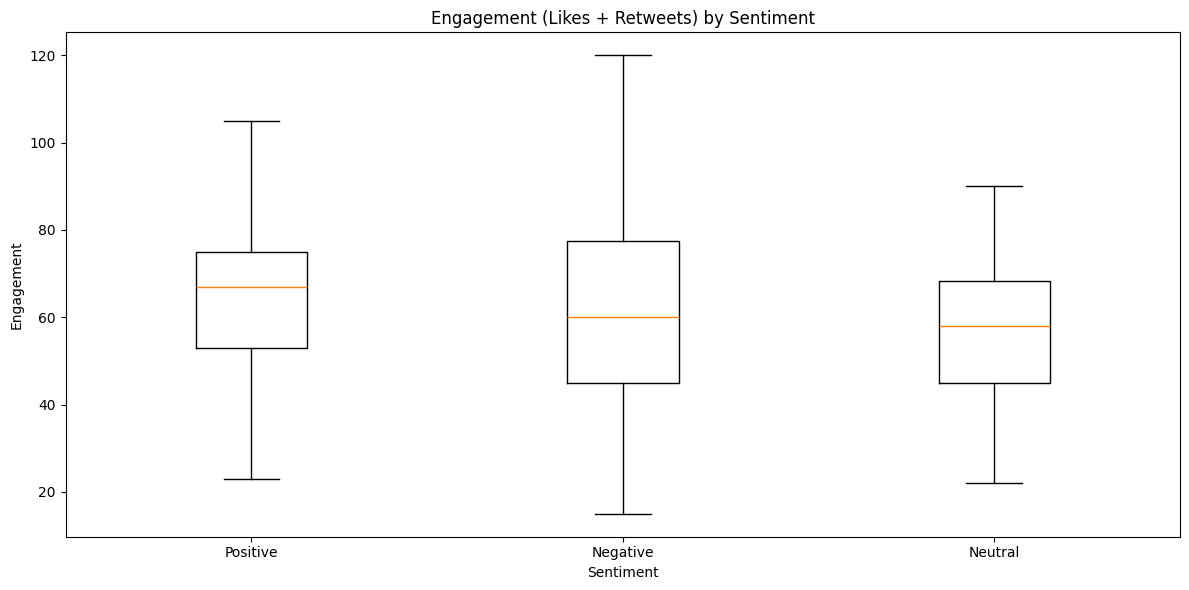

In [5]:
sentiments = df["SentimentSimple"].value_counts().index.tolist()
data_for_box = [df[df["SentimentSimple"] == s]["Engagement"].values for s in sentiments]

plt.figure(figsize=(12,6))
plt.boxplot(data_for_box, labels=sentiments, showfliers=False)

plt.title("Engagement (Likes + Retweets) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Engagement")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


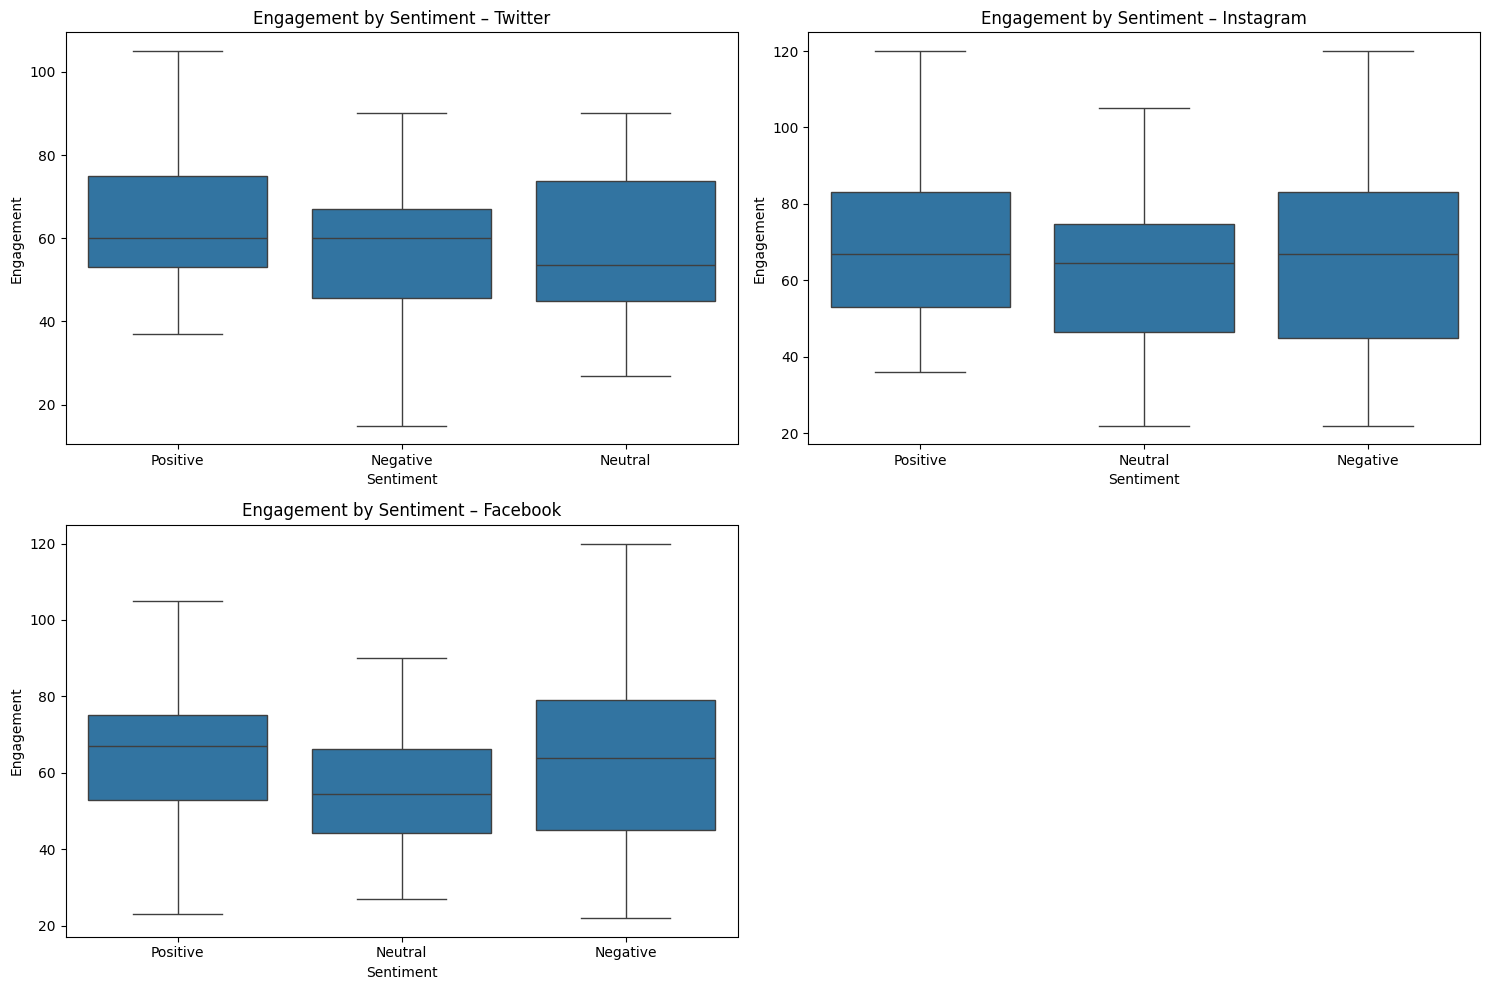

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

platforms = df["Platform"].unique()
n = len(platforms)

plt.figure(figsize=(15, 5 * (n // 2 + 1)))

for i, p in enumerate(platforms, 1):
    plt.subplot((n // 2) + 1, 2, i)
    sns.boxplot(data=df[df["Platform"] == p], 
                x="SentimentSimple", 
                y="Engagement", 
                showfliers=False)
    plt.title(f"Engagement by Sentiment – {p}")
    plt.xlabel("Sentiment")
    plt.ylabel("Engagement")

plt.tight_layout()
plt.show()


1. Instagram users respond most consistently to uplifting, aesthetic, show-and-tell style content. Negative sentiment is less reliable here — it can spike, but not as consistently as positive.
2. Negative or controversial posts on Twitter and Facebook generate more conversation, reactions, and volatility, which drives engagement spikes.
3. Across Twitter, Instagram, and Facebook:
- Neutral posts have the lowest median engagement
- The tightest IQR (most predictable but lowest impact)
- The lowest maximum engagement
Brands and creators should avoid bland, informational posts if the goal is reach or engagement.